In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

log1=pd.read_csv('../vol1_ext_alcore/log_real.csv')
log2=pd.read_csv('../vol2_ext_alcore/log_real.csv')


def gen_grad_acc(df):
    
    df3=df
    import transforms3d as tf3d
    
    acc_ned_grad=np.zeros((len(df3),3))

    acc_ned_grad[:,0]=np.diff(df3['speed[0]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,0]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,0]])

    acc_ned_grad[:,1]=np.diff(df3['speed[1]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,1]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,1]])


    acc_ned_grad[:,2]=np.diff(df3['speed[2]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,2]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,2]])

    acc_body_grad=np.zeros((len(df3),3))

    for i in df3.index:
        q0,q1,q2,q3=df3["q[0]"][i],df3["q[1]"][i],df3["q[2]"][i],df3["q[3]"][i]
    #     print(i,q0,q1,q2,q3)
        R=tf3d.quaternions.quat2mat(np.array([q0,q1,q2,q3]))
        acc_body_grad[i]=R.T@(acc_ned_grad[i].reshape((3,1))).flatten()
        
    
    df3['acc_ned_grad[0]'],df3['acc_ned_grad[1]'],df3['acc_ned_grad[2]']=acc_ned_grad.T
    df3['acc_body_grad[0]'],df3['acc_body_grad[1]'],df3['acc_body_grad[2]']=acc_body_grad.T
    
    return df3


log1_new=gen_grad_acc(log1)
log2_new=gen_grad_acc(log2)

log1_new.to_csv('../vol1_ext_alcore/log_real.csv')

In [3]:
log1_new

,t,acc[0],acc[1],acc[2],speed[0],speed[1],speed[2],pos[0],pos[1],pos[2],...,PWM_motor[4],PWM_motor[5],PWM_motor[6],takeoff,acc_ned_grad[0],acc_ned_grad[1],acc_ned_grad[2],acc_body_grad[0],acc_body_grad[1],acc_body_grad[2]
0,0.000000,0.006025,-0.017269,0.016462,0.008110,-0.015981,0.002493,0.123243,0.203548,0.226099,...,1075.0,1075.0,1075.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.004014,0.006025,-0.017269,0.016462,0.008110,-0.015981,0.002493,0.123243,0.203548,0.226099,...,1075.0,1075.0,1075.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.007291,0.006025,-0.017269,0.016462,0.008110,-0.015981,0.002493,0.123243,0.203548,0.226099,...,1075.0,1075.0,1075.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.015249,0.006025,-0.017269,0.016462,0.008110,-0.015981,0.002493,0.123243,0.203548,0.226099,...,1075.0,1075.0,1075.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.019995,0.006025,-0.017269,0.016462,0.008110,-0.015981,0.002493,0.123243,0.203548,0.226099,...,1075.0,1075.0,1075.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65514,276.720830,0.143907,-0.085768,-0.034023,0.500131,-0.585261,0.031190,11.597409,-6.214849,1.470999,...,900.0,900.0,900.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
65515,276.724792,0.143907,-0.085768,-0.034023,0.500131,-0.585261,0.031190,11.597409,-6.214849,1.470999,...,900.0,900.0,900.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
65516,276.728836,0.143907,-0.085768,-0.034023,0.500131,-0.585261,0.031190,11.597409,-6.214849,1.470999,...,900.0,900.0,900.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
65517,276.732792,0.143907,-0.085768,-0.034023,0.500131,-0.585261,0.031190,11.597409,-6.214849,1.470999,...,900.0,900.0,900.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
log2_new

,t,acc[0],acc[1],acc[2],speed[0],speed[1],speed[2],pos[0],pos[1],pos[2],...,PWM_motor[4],PWM_motor[5],PWM_motor[6],takeoff,acc_ned_grad[0],acc_ned_grad[1],acc_ned_grad[2],acc_body_grad[0],acc_body_grad[1],acc_body_grad[2]
0,0.000000,-0.075099,0.159154,0.010356,-0.187284,0.377213,-0.013297,-1.292536,0.114451,0.201608,...,1075.0,1075.0,1075.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.004015,-0.075099,0.159154,0.010356,-0.187284,0.377213,-0.013297,-1.292536,0.114451,0.201608,...,1075.0,1075.0,1075.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.008001,-0.075099,0.159154,0.010356,-0.187284,0.377213,-0.013297,-1.292536,0.114451,0.201608,...,1075.0,1075.0,1075.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.012054,-0.075099,0.159154,0.010356,-0.187284,0.377213,-0.013297,-1.292536,0.114451,0.201608,...,1075.0,1075.0,1075.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.016013,-0.075099,0.159154,0.010356,-0.187284,0.377213,-0.013297,-1.292536,0.114451,0.201608,...,1075.0,1075.0,1075.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36327,153.988808,-0.028521,0.015425,0.028109,-0.057313,0.038731,0.012617,-12.281284,3.355860,-0.242965,...,900.0,900.0,900.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
36328,153.992839,-0.028521,0.015425,0.028109,-0.057313,0.038731,0.012617,-12.281284,3.355860,-0.242965,...,900.0,900.0,900.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
36329,153.996808,-0.028521,0.015425,0.028109,-0.057313,0.038731,0.012617,-12.281284,3.355860,-0.242965,...,900.0,900.0,900.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
36330,154.000814,-0.028521,0.015425,0.028109,-0.057313,0.038731,0.012617,-12.281284,3.355860,-0.242965,...,900.0,900.0,900.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


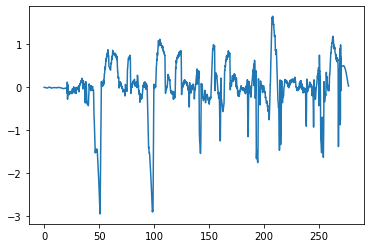

In [5]:
plt.plot(log1.t,log1['speed[2]'])

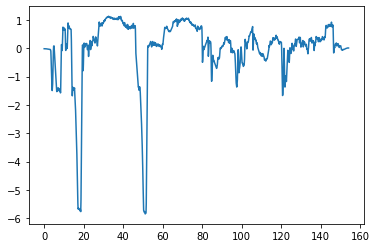

In [6]:
plt.plot(log2.t,log2['speed[2]'])

In [7]:
log1_r=log1[log1["t"]>40]
log1_r=log1_r[log1_r["t"]<255]

log2_r=log2[log2["t"]>10]
log2_r=log2_r[log2_r['t']<140]


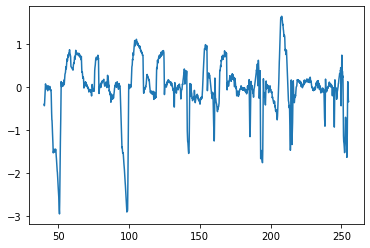

In [8]:
plt.plot(log1_r.t,log1_r['speed[2]'])

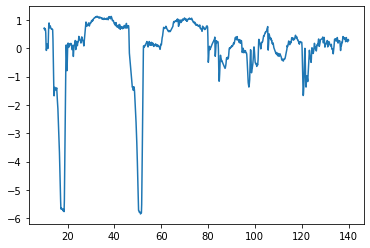

In [9]:
plt.plot(log2_r.t,log2_r['speed[2]'])

In [10]:
log1_r["t"]=log1_r["t"]-log1_r['t'].min()
log2_r["t"]=log2_r["t"]-log2_r['t'].min()+5e-3+log1_r["t"].max()


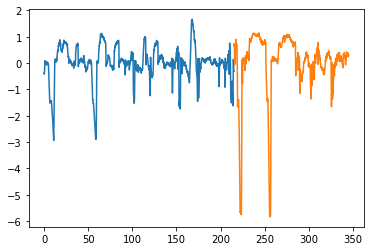

In [11]:
plt.plot(log1_r.t,log1_r['speed[2]'])
plt.plot(log2_r.t,log2_r['speed[2]'])

In [12]:
df3=pd.concat([log1_r,log2_r])

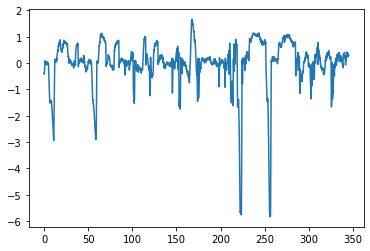

In [13]:
plt.plot(df3.t,df3['speed[2]'])


In [14]:
df3=df3.reset_index()


In [15]:
import transforms3d as tf3d

In [16]:
acc_ned_grad=np.zeros((len(df3),3))

acc_ned_grad[:,0]=np.diff(df3['speed[0]'],append=0)/np.diff(df3["t"],append=4e-3)

acc_ned_grad[:,0]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,0]])

acc_ned_grad[:,1]=np.diff(df3['speed[1]'],append=0)/np.diff(df3["t"],append=4e-3)

acc_ned_grad[:,1]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,1]])


acc_ned_grad[:,2]=np.diff(df3['speed[2]'],append=0)/np.diff(df3["t"],append=4e-3)

acc_ned_grad[:,2]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,2]])


In [17]:
acc_body_grad=np.zeros((len(df3),3))

for i in df3.index:
    q0,q1,q2,q3=df3["q[0]"][i],df3["q[1]"][i],df3["q[2]"][i],df3["q[3]"][i]
#     print(i,q0,q1,q2,q3)
    R=tf3d.quaternions.quat2mat(np.array([q0,q1,q2,q3]))
    acc_body_grad[i]=R.T@(acc_ned_grad[i].reshape((3,1))).flatten()
    

In [18]:

df3['acc_ned_grad[0]'],df3['acc_ned_grad[1]'],df3['acc_ned_grad[2]']=acc_ned_grad.T
df3['acc_body_grad[0]'],df3['acc_body_grad[1]'],df3['acc_body_grad[2]']=acc_body_grad.T

In [19]:
df3.to_csv('./log_real.csv')

(-15.0, 15.0)

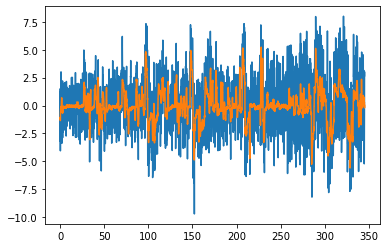

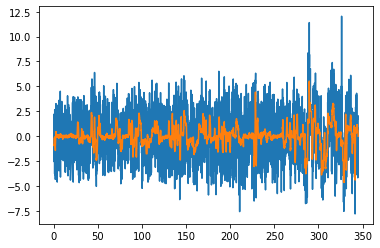

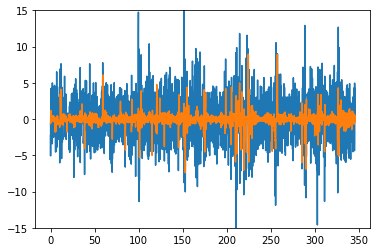

In [20]:
[(plt.figure(),plt.plot(df3["t"],df3['acc[%i]'%(i)]),plt.plot(df3["t"],df3['acc_ned_grad[%i]'%(i)])) for i in range(3)]
plt.gca().set_ylim(-15,15)